# Introduction :

We are given the dataset about bank information of around 10000 customers and also given if they have churned or not. Our task is to build a ML model such that we can predict if a customer is going to churn or not

# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, log_loss,jaccard_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Data Exploration 
Feature Description:
1. Customer ID - Unique ID given to identify a particular customer.
2. Credit Score - It is the score which determines the creditworthiness of a customer.
3. Country - The country where customer lives.
4. Gender - The Sex of customer.
5. Age - The age of customer.
6. Tenure - Number of years the customer has Bank Account in that Bank.
7. Balance - Amount of money present in customer's bank.
8. Products Number - Number of Products from that Bank.
9. Credit Card - Does the customer own a credit card of that Bank.
10. Active Member - Whether the customer is an active member of that Bank.
11. Estimated Salary - Total Income of the Customer.
12. Churn - Churn (Loss of existing customers) of the Bank.

In [2]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Modelling

In [3]:
cols = ['credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn']

In [4]:
df1 = df[cols]
df1.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


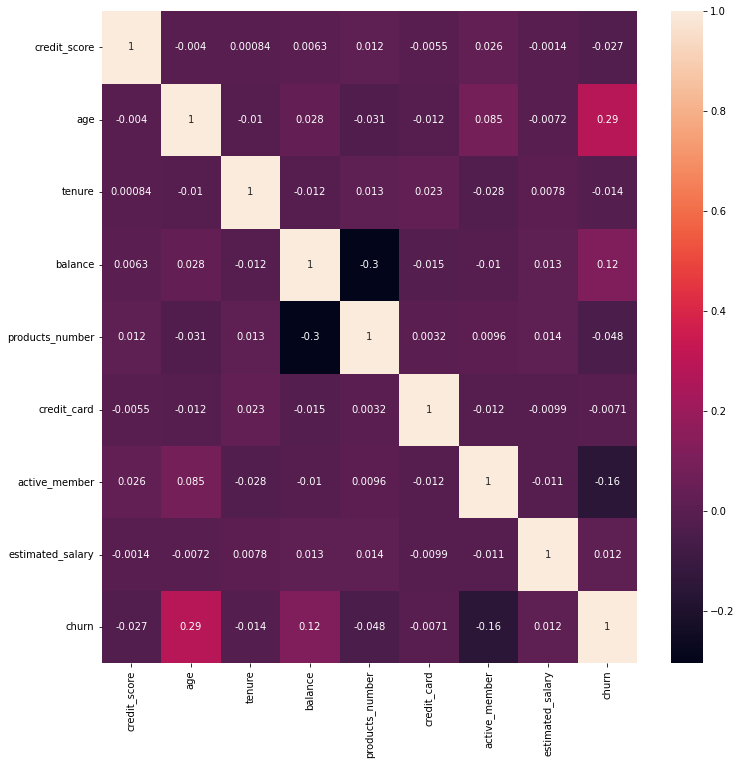

In [5]:
plt.figure(figsize=(12, 12))
sns.heatmap(df1.corr(), annot=True)
plt.show()

## Preprocessing Data

In [6]:
# Dummies column gender, country
df1["gender"] = LabelEncoder().fit_transform(df1["gender"])
df1["country"] = LabelEncoder().fit_transform(df1["country"])

/var/folders/gy/_1b3qgfj1w18yd43nlg6wc7h0000gn/T/ipykernel_79831/2102425979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["gender"] = LabelEncoder().fit_transform(df1["gender"])
/var/folders/gy/_1b3qgfj1w18yd43nlg6wc7h0000gn/T/ipykernel_79831/2102425979.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["country"] = LabelEncoder().fit_transform(df1["country"])


In [7]:
df1.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# Tao features va target
X = df1[df1.columns[:-1]]
y = df1[df1.columns[-1]].values

In [9]:
# chuan hoa du lieu
X = StandardScaler().fit_transform(X)

In [10]:
# tao tap du lieu train/test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0)

In [11]:
# Tạo dictionary để lưu kết quả của các models
model_scores = {"Models":["Logistic_Regression", "KNN", "Neural_Network", "SVC", "RandomForest", "ExtraTrees", "XGBoost"],
         "Accuracy":[],
         "F1_score":[]}

## Logistic Regression model

In [12]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [13]:
# predict on test set
lr_predict = lr.predict(X_test)

In [14]:
print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1595
           1       0.58      0.18      0.27       405

    accuracy                           0.81      2000
   macro avg       0.70      0.57      0.58      2000
weighted avg       0.77      0.81      0.76      2000



/Users/nguyenphuonganh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


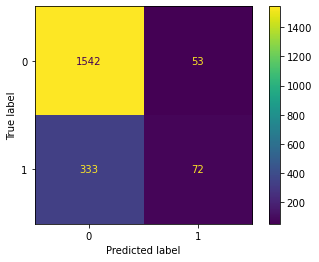

In [15]:
plot_confusion_matrix(lr, X_test, y_test)
plt.show()

In [16]:
# Update f1 score of logistic regression model
model_scores["Accuracy"].append(accuracy_score(y_test, lr_predict))
model_scores["F1_score"].append(f1_score(y_test, lr_predict))

## KNN model with turning parameters

In [17]:
# Training Knn model with best parameter
knn_model = KNeighborsClassifier(n_neighbors=9,
                                 metric="minkowski",
                                 p=2)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [18]:
# KNN predict on test set
knn_model_predict = knn_model.predict(X_test)

In [19]:
print(classification_report(y_test, knn_model_predict))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1595
           1       0.69      0.38      0.49       405

    accuracy                           0.84      2000
   macro avg       0.78      0.67      0.70      2000
weighted avg       0.83      0.84      0.82      2000



/Users/nguyenphuonganh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


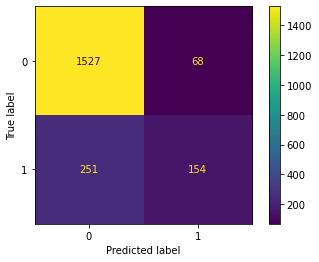

In [20]:
# Plot confusion matrix of knn model
plot_confusion_matrix(knn_model, X_test, y_test)

In [21]:
# Update f1 score and accuracy score of KNN model
model_scores["Accuracy"].append(accuracy_score(y_test, knn_model_predict))
model_scores["F1_score"].append(f1_score(y_test, knn_model_predict))

## Neural Network Model

In [22]:
from sklearn.neural_network import MLPClassifier

In [23]:
# Training NN model 
nn_model = MLPClassifier(hidden_layer_sizes=[10, 10])
nn_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=[10, 10])

In [24]:
# NN model predict
nn_model_predict = nn_model.predict(X_test)

In [25]:
print(classification_report(y_test, nn_model_predict))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.71      0.51      0.59       405

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



/Users/nguyenphuonganh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


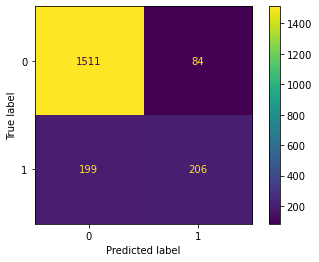

In [26]:
plot_confusion_matrix(nn_model, X_test, y_test)

In [27]:
# Update f1 score and accuracy score of NN model
model_scores["Accuracy"].append(accuracy_score(y_test, nn_model_predict))
model_scores["F1_score"].append(f1_score(y_test, nn_model_predict))

## SVC Model

In [28]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [29]:
# svc predict
svc_predict = svc.predict(X_test)

In [30]:
print(classification_report(y_test, svc_predict))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1595
           1       0.83      0.41      0.55       405

    accuracy                           0.86      2000
   macro avg       0.85      0.69      0.73      2000
weighted avg       0.86      0.86      0.84      2000



/Users/nguyenphuonganh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


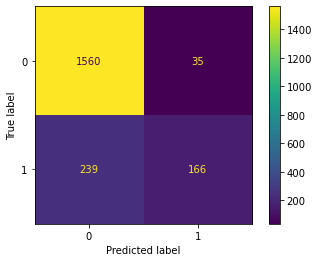

In [31]:
plot_confusion_matrix(svc, X_test, y_test)

In [32]:
# Update f1 score and accuracy score of SVC model
model_scores["Accuracy"].append(accuracy_score(y_test, svc_predict))
model_scores["F1_score"].append(f1_score(y_test, svc_predict))

## RandomForestClassifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
rfc_predict = rfc.predict(X_test)

In [35]:
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.74      0.50      0.60       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



/Users/nguyenphuonganh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


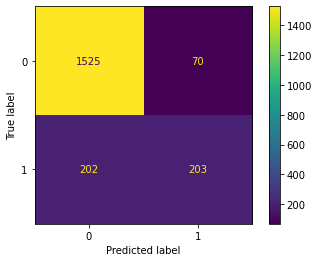

In [36]:
plot_confusion_matrix(rfc, X_test, y_test)
plt.show()

In [37]:
# Update f1 score and accuracy score of RandomForest
model_scores["Accuracy"].append(accuracy_score(y_test, rfc_predict))
model_scores["F1_score"].append(f1_score(y_test, rfc_predict))

## ExtraTreesClassifier

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(X_train, y_train)

ExtraTreesClassifier(random_state=0)

In [39]:
etc_predict = etc.predict(X_test)

In [40]:
print(classification_report(y_test, etc_predict))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.75      0.50      0.60       405

    accuracy                           0.86      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.86      0.85      2000



In [41]:
# Update f1 score and accuracy score of ExtraTrees model
model_scores["Accuracy"].append(accuracy_score(y_test, etc_predict))
model_scores["F1_score"].append(f1_score(y_test, etc_predict))

In [42]:
f1_score(y_test, etc_predict)

0.5973254086181279

## XGBClassifier

In [43]:
from xgboost import XGBClassifier

/Users/nguyenphuonganh/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [44]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

[14:58:14] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/nguyenphuonganh/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
xgb_predict = xgb.predict(X_test)

In [46]:
print(classification_report(y_test, xgb_predict))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1595
           1       0.68      0.51      0.58       405

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



/Users/nguyenphuonganh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


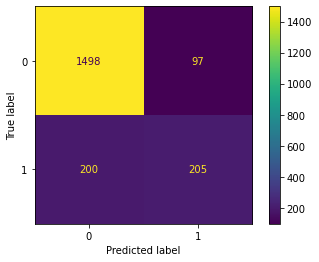

In [47]:
plot_confusion_matrix(xgb, X_test, y_test)

In [48]:
# Update f1 score and accuracy score of XGBoost model
model_scores["Accuracy"].append(accuracy_score(y_test, xgb_predict))
model_scores["F1_score"].append(f1_score(y_test, xgb_predict))

In [49]:
df_model_score = pd.DataFrame(model_scores)

In [50]:
df_model_score.sort_values(by="Accuracy", ascending=False, inplace=True)

In [51]:
df_model_score

,Models,Accuracy,F1_score
5,ExtraTrees,0.8645,0.597325
4,RandomForest,0.8640,0.598820
3,SVC,0.8630,0.547855
2,Neural_Network,0.8585,0.592806
6,XGBoost,0.8515,0.579915
1,KNN,0.8405,0.491228
0,Logistic_Regression,0.8070,0.271698


# Conclusion
Dựa trên kết quả của các model ML, ta có thể nhận thấy:
 - Neural Network và RandomForest cho kết quả tốt nhất